In [19]:
#Importations de bibliothèques :
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

%config InlineBackend.figure_format = 'retina'

In [20]:
from plotly.offline import plot
from google.colab import files

#Source : [Natural Disasters between 1900-2021](https://www.kaggle.com/jnegrini/emdat19002021)

**LE CHANGEMENT CLIMATIQUE EST-IL GRAVE ?**

## Préparation de données

### Chargement du CSV

In [21]:
#Importation de CSV
nd = pd.read_csv('https://raw.githubusercontent.com/marcthavy/GlobalWarming/main/csv/emdat_public_2021_04_07_query_uid-bye82f_1.csv', header = 6)
at = pd.read_csv('https://raw.githubusercontent.com/marcthavy/GlobalWarming/main/csv/global_anormal_temp_land.csv', sep = ',' , header = 4)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (24,25) have mixed types.Specify dtype option on import or set low_memory=False.



### Fonctions

In [22]:
def translate_table(table):
  for column in table:
    table[column] = table[column].apply(translate)

def translate(x):
  dictionnaire = {
    'Natural':'Naturel',
    'Technological':'Technologique',
    'Hydrological':'Hydrologique',
    'Meteorological':'Météorologique',
    'Geophysical':'Géophysique',
    'Biological':'Biologique',
    'Climatological':'Climatologique',
    'Extra-terrestrial':'Extra-terrestre',
    'Transport accident':'Accident de transport',
    'Flood':'Inondation',
    'Storm':'Tempête',
    'Earthquake':'Tremblement de terre',
    'Industrial accident':'Accident industriel',
    'Miscellaneous accident':'Accident divers',
    'Epidemic':'Épidémie',
    'Landslide':'Glissement de terrain',
    'Drought':'Sécheresse',
    'Extreme temperature':'Température extrême',
    'Wildfire':'Incendie',
    'Volcanic activity':'Activité volcanique',
    'Insect infestation':'Infestation d\'insectes',
    'Mass movement (dry)':'Mouvement de masse (sec)',
    'Impact':'Impact',
    'Glacial lake outburst':'Explosion du lac glaciaire',
    'Fog':'Brouillard',
    'Animal accident':'Accident animal'    
    }
  
  for i, j in dictionnaire.items():
    if x == i:
      return j
  return x

### Traitement des données

In [23]:
#Jointure
nd_at = pd.merge(
    nd,
    at,
    how = 'left',
    left_on = 'Year',
    right_on = 'Year'
    )

#Filtres
nd_at = nd_at[nd_at['Disaster Type'] == 'Flood']
nd_at = nd_at[nd_at['Year'] < 2021]
nd = nd[nd['Disaster Group'] == 'Natural']
nd = nd[nd['Year'] < 2021]

#Création de colonnes

nd_at['Flag'] = nd_at['Total Deaths']
nd_at['Flag'].fillna(False,inplace = True)
nd_at['Flag'] = nd_at['Flag'].apply(lambda x: int(x))
nd_at['Flag'] = nd_at['Flag'].apply(lambda x: 'Avec' if bool(x) == True else 'Sans')
nd_at['Decade'] = nd_at['Year'].apply(lambda x: (x//10)*10)

nd_at['Nb Inondation par Year and Flag'] = nd_at.groupby(['Year','Flag'])['Year'].transform('count')
nd_at['Nb Inondation par Decade and ISO'] = nd_at.groupby(['Decade','ISO'])['Year'].transform('count')
nd_at['Nb Inondation par Year'] = nd_at.groupby(['Year'])['Year'].transform('count')

nd['Flag'] = nd['Total Deaths']
nd['Flag'].fillna(False,inplace = True)
nd['Flag'] = nd['Flag'].apply(lambda x: int(x))
nd['Flag'] = nd['Flag'].apply(lambda x: 'Avec' if bool(x) == True else 'Sans')
nd['Decade'] = nd['Year'].apply(lambda x: (x//10)*10)

#Traduction
translate_table(nd)
translate_table(nd_at)

#Table Pivot
ds_count = nd.pivot_table(values = ['Country','Total Deaths'],
                          index = ['Disaster Subgroup'],
                          aggfunc = 'count'
                          ).sort_values(by = 'Country', ascending = False)

ds_sum = nd.pivot_table(values = ['Country','Total Deaths'],
                        index = ['Disaster Subgroup'],
                        aggfunc = 'sum'
                        ).sort_values(by = 'Total Deaths', ascending = False)

dt_count = nd.pivot_table(values = ['Country','Total Deaths'],
                          index = ['Disaster Type'],
                          aggfunc = 'count'
                          ).sort_values(by = 'Country', ascending = False)

dt_sum = nd.pivot_table(values = ['Country','Total Deaths'],
                        index = ['Disaster Type'],
                        aggfunc = 'count'
                        ).sort_values(by = 'Total Deaths', ascending = False)

In [24]:
#Configuration
px_template = 'plotly_white'

traduction = {
  'Flag': 'Victime',
  'Value': 'Anomalie de température',
  'Nb Inondation par Year and Flag': 'Nombre d\'inondation',
  'Nb Inondation par Decade and ISO': 'Nombre d\'inondation',
  'MONTH': 'Month',
  'Year': 'Année',
  'Decade': 'Décennie',
  'ISO': 'Codes régions',
  }

title_size = 20
label_size = 18
tick_size = 16
regular_size = 16

px_title_settings = {'font_size' : title_size}
px_regular_setting = {'size' : regular_size}

px_legend_setting = dict(
    yanchor = 'top',
    y = 0.99,
    xanchor = 'left',
    x = 0.01
    )

sns_style = 'whitegrid'
fig_size = (11,9)

plt_title_settings = {
    'fontsize' : title_size,
    }

plt_label_settings = {
    'fontsize' : label_size,
    }

# Focus : Inondation

## Seaborn - Scatterplot

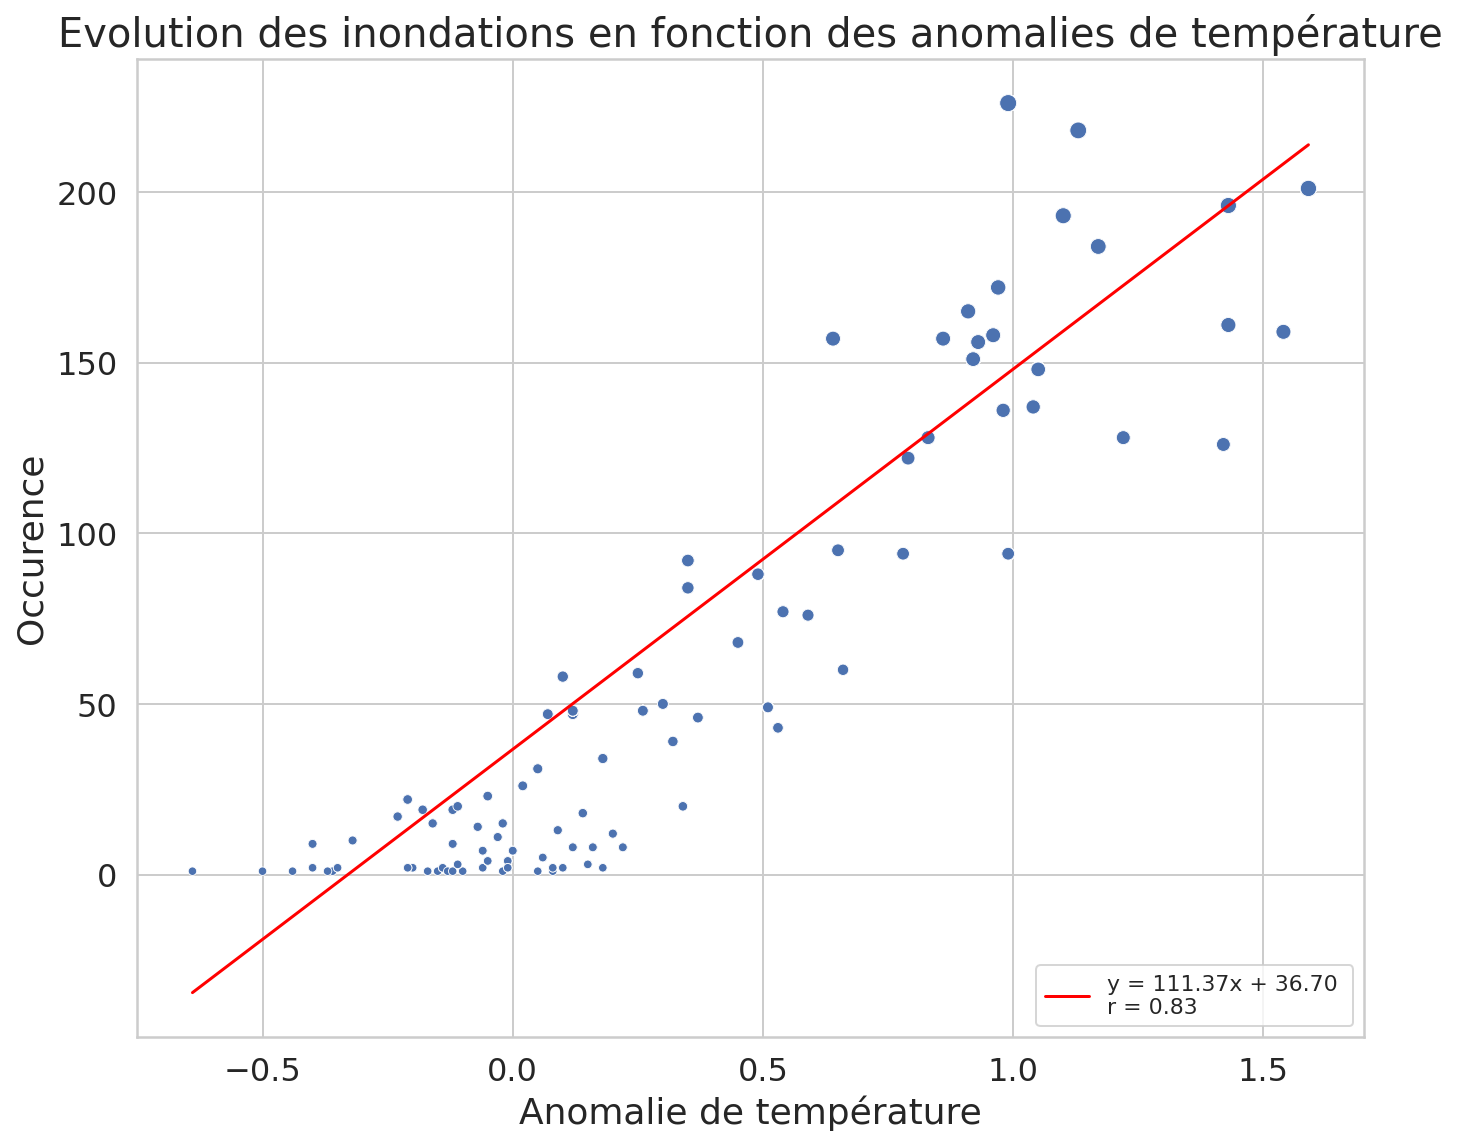

In [27]:
data = nd_at

fig = plt.figure(figsize = fig_size)

sns.set_theme(style = sns_style)

Xaxis = data['Value']
Yaxis = data['Nb Inondation par Year']

model = np.polyfit(x = Xaxis, y = Yaxis, deg = 1)
r2 = Xaxis.corr(Yaxis)

sns.scatterplot(
    data = data,
    x = 'Value',
    y = 'Nb Inondation par Year',
    size = 'Nb Inondation par Year')

array = (Xaxis.min(),Xaxis.max())

plt.plot(
    array,
    np.poly1d(model)(array),
    color = 'red')

plt.title('Evolution des inondations en fonction des anomalies de température', fontdict = plt_title_settings)
plt.xlabel('Anomalie de température', fontdict = plt_label_settings)
plt.ylabel('Occurence', fontdict = plt_label_settings)
plt.legend(labels = [f'y = {model[0]:.2f}x + {model[1]:.2f} \nr = {r2:.2f}'], loc = 'lower right')
plt.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

plt.show()

## Plotly - Scatter

In [28]:
data = nd_at

fig = px.scatter(
    data_frame = data,
    x = 'Value',
    y = 'Nb Inondation par Year and Flag',
    size = 'Nb Inondation par Year and Flag',
    color = 'Flag',
    color_discrete_map = {
    'Avec': '#FFA15A',
    'Sans': '#00CC96'},
    hover_name = 'Year',
    trendline = 'ols',
    trendline_color_override = 'red',
    labels = traduction,
    template = px_template,
    title = 'Evolution des inondations en fonction<br>des anomalies de température'
    )

fig.update_layout(
    title = px_title_settings,
    title_x = 0.5,
    width = 840,
    height = 600,
    legend = px_legend_setting,
    xaxis = dict(tickfont = dict(size = tick_size)),
    yaxis = dict(tickfont = dict(size = tick_size)),
    font = px_regular_setting,
    )

fig.update_yaxes(title_font_size = label_size)
fig.update_xaxes(title_font_size = label_size,
                 #rangeslider_visible = True
                 )

fig.show()

#plot(fig)
#files.download('temp-plot.html')

## Plotly - Scatter 3D

In [29]:
data = nd_at

fig = px.scatter_3d(
    data_frame = data,
    x = 'Year',
    y = 'Value',
    z = 'Nb Inondation par Year and Flag',
    size = 'Nb Inondation par Year and Flag',
    size_max = 30,
    symbol='Flag',
    color = 'Flag',
    color_discrete_map = {
      'Avec': '#FFA15A',
      'Sans': '#00CC96'},
    hover_name = 'Year',
    labels = traduction,
    template = px_template,
    title = 'Evolution des inondations en fonction<br>des années et des anomalies de température'
    )

fig.update_layout(
    title = px_title_settings,
    title_x = 0.5,
    width = 840, height = 600,
    legend = px_legend_setting,
    font = {'size' : regular_size-4}
    )

fig.show()

#plot(fig)
#files.download('temp-plot.html')

## Plotly - Choropleth

In [30]:
fig = px.choropleth(
    data_frame = nd_at,
    locations = 'ISO',
    color = 'Nb Inondation par Decade and ISO',
    range_color = (0, 90),
    hover_name = 'Country',
    animation_frame = 'Decade',
    color_continuous_scale = px.colors.sequential.Sunsetdark,
    labels = traduction,
    title = 'Evolution des inondations dans le monde par décennie',
    projection  = 'natural earth')

fig.update_layout(
    title = px_title_settings,
    title_x = 0.5,
    width = 1140,
    height = 720,
    font = px_regular_setting,
    )

fig.show()

#plot(fig)
#files.download('temp-plot.html')

# Historique & Evolutions des catastrophes naturelles dans le temps

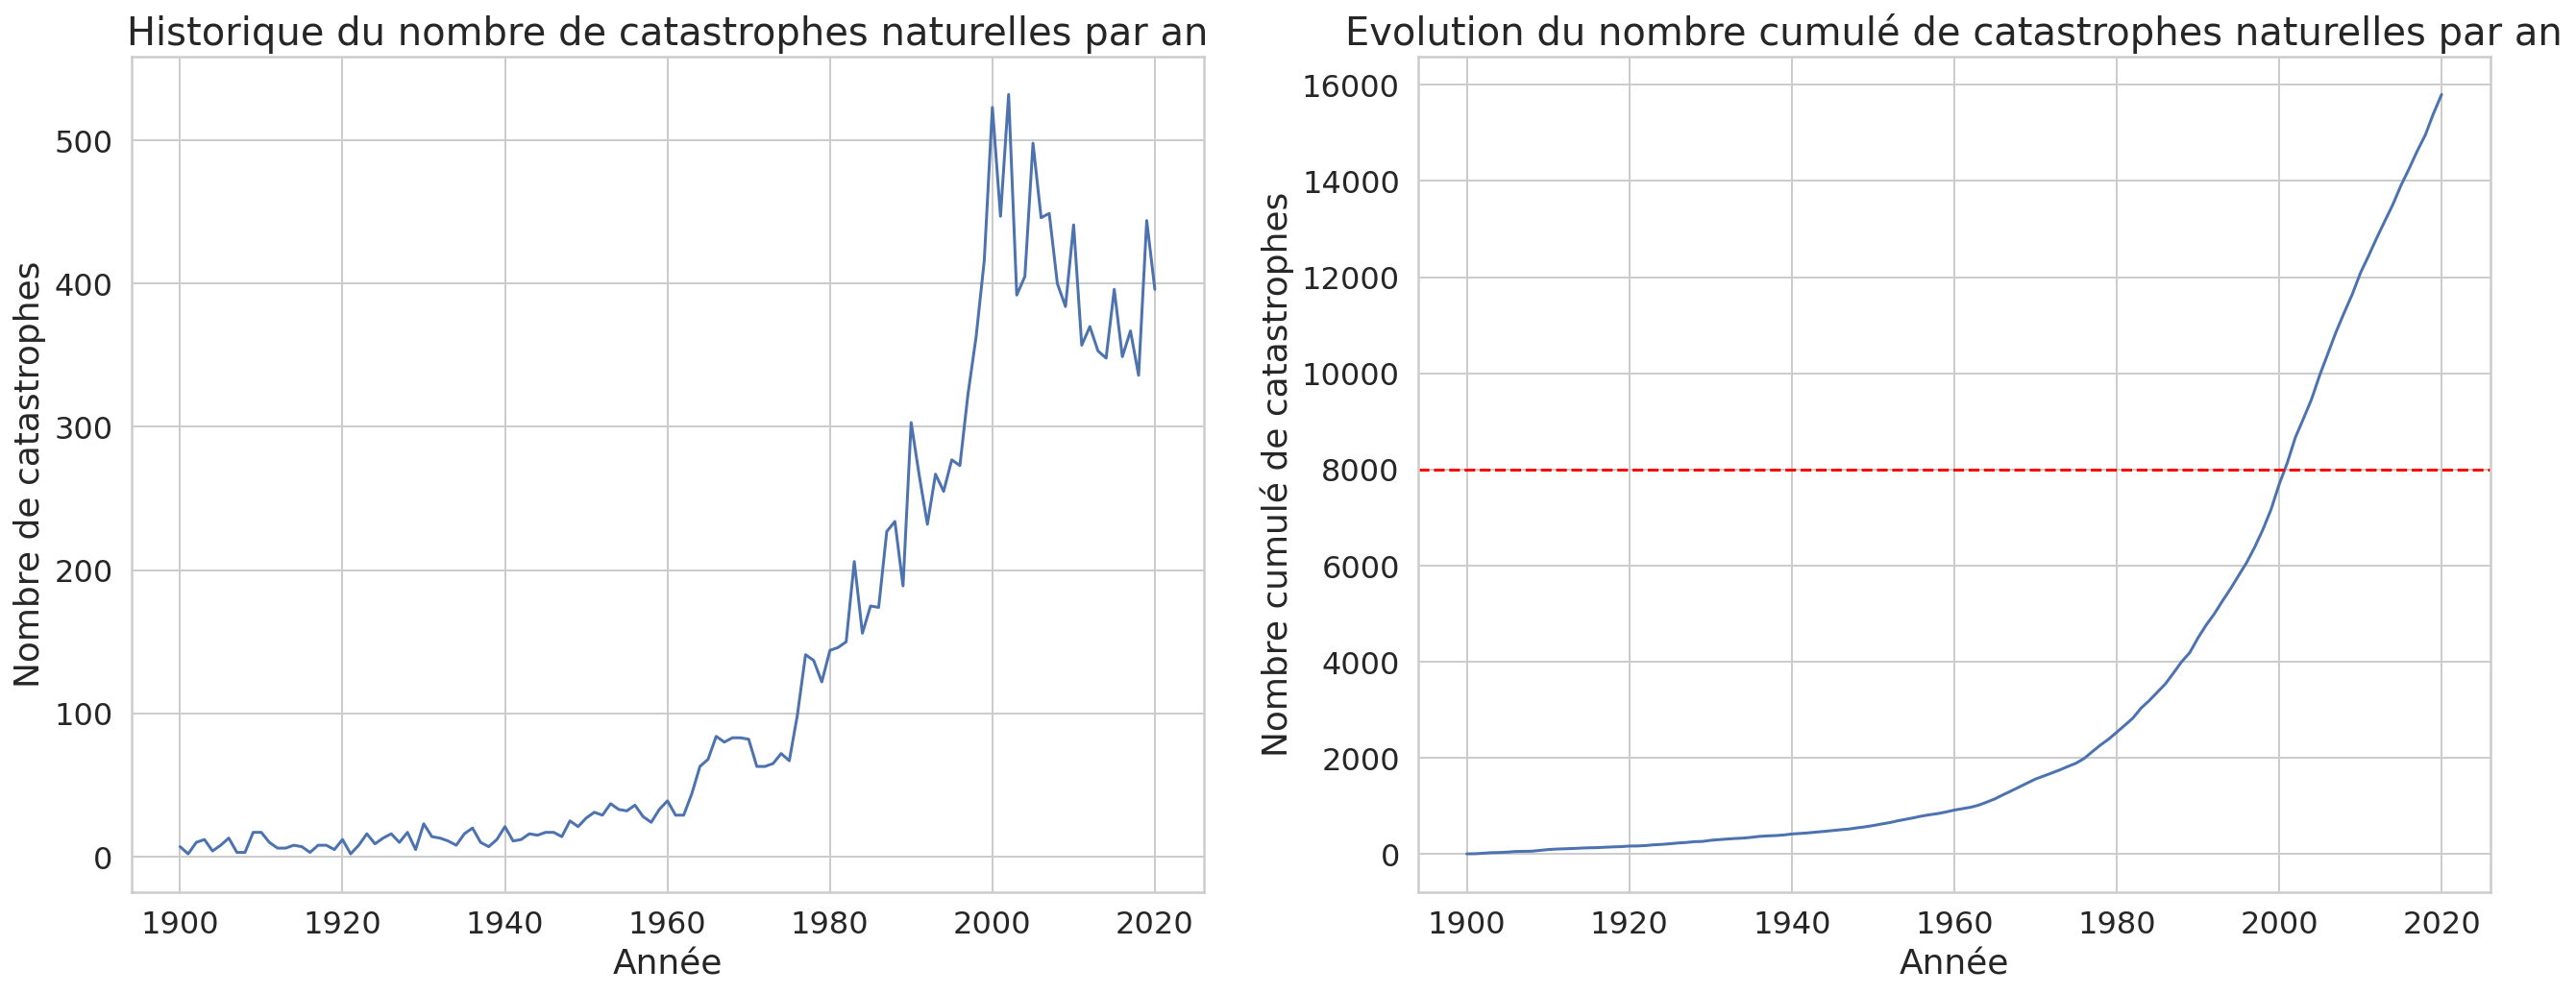

In [31]:
data = nd

x = data['Year'].value_counts().sort_index()
x2 = np.cumsum(list(x))

fig, ax = plt.subplots(figsize = (22, 8))

sns.set_theme(style = sns_style)

ax_grave_01 = plt.subplot(121)
plt.plot(list(x.index),list(x))
plt.title('Historique du nombre de catastrophes naturelles par an', fontdict = plt_title_settings)
plt.xlabel('Année', fontdict = plt_label_settings)
plt.ylabel('Nombre de catastrophes', fontdict = plt_label_settings)
plt.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

ax_grave_02 = plt.subplot(122)
plt.plot(list(x.index),x2)
plt.axhline(8000, color = 'red', linestyle = '--')
plt.title('Evolution du nombre cumulé de catastrophes naturelles par an', fontdict = plt_title_settings)
plt.xlabel('Année', fontdict = plt_label_settings)
plt.ylabel('Nombre cumulé de catastrophes', fontdict = plt_label_settings)
plt.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

plt.show()

# Recensement des catastrophes naturelles depuis 1900

## Version compacte

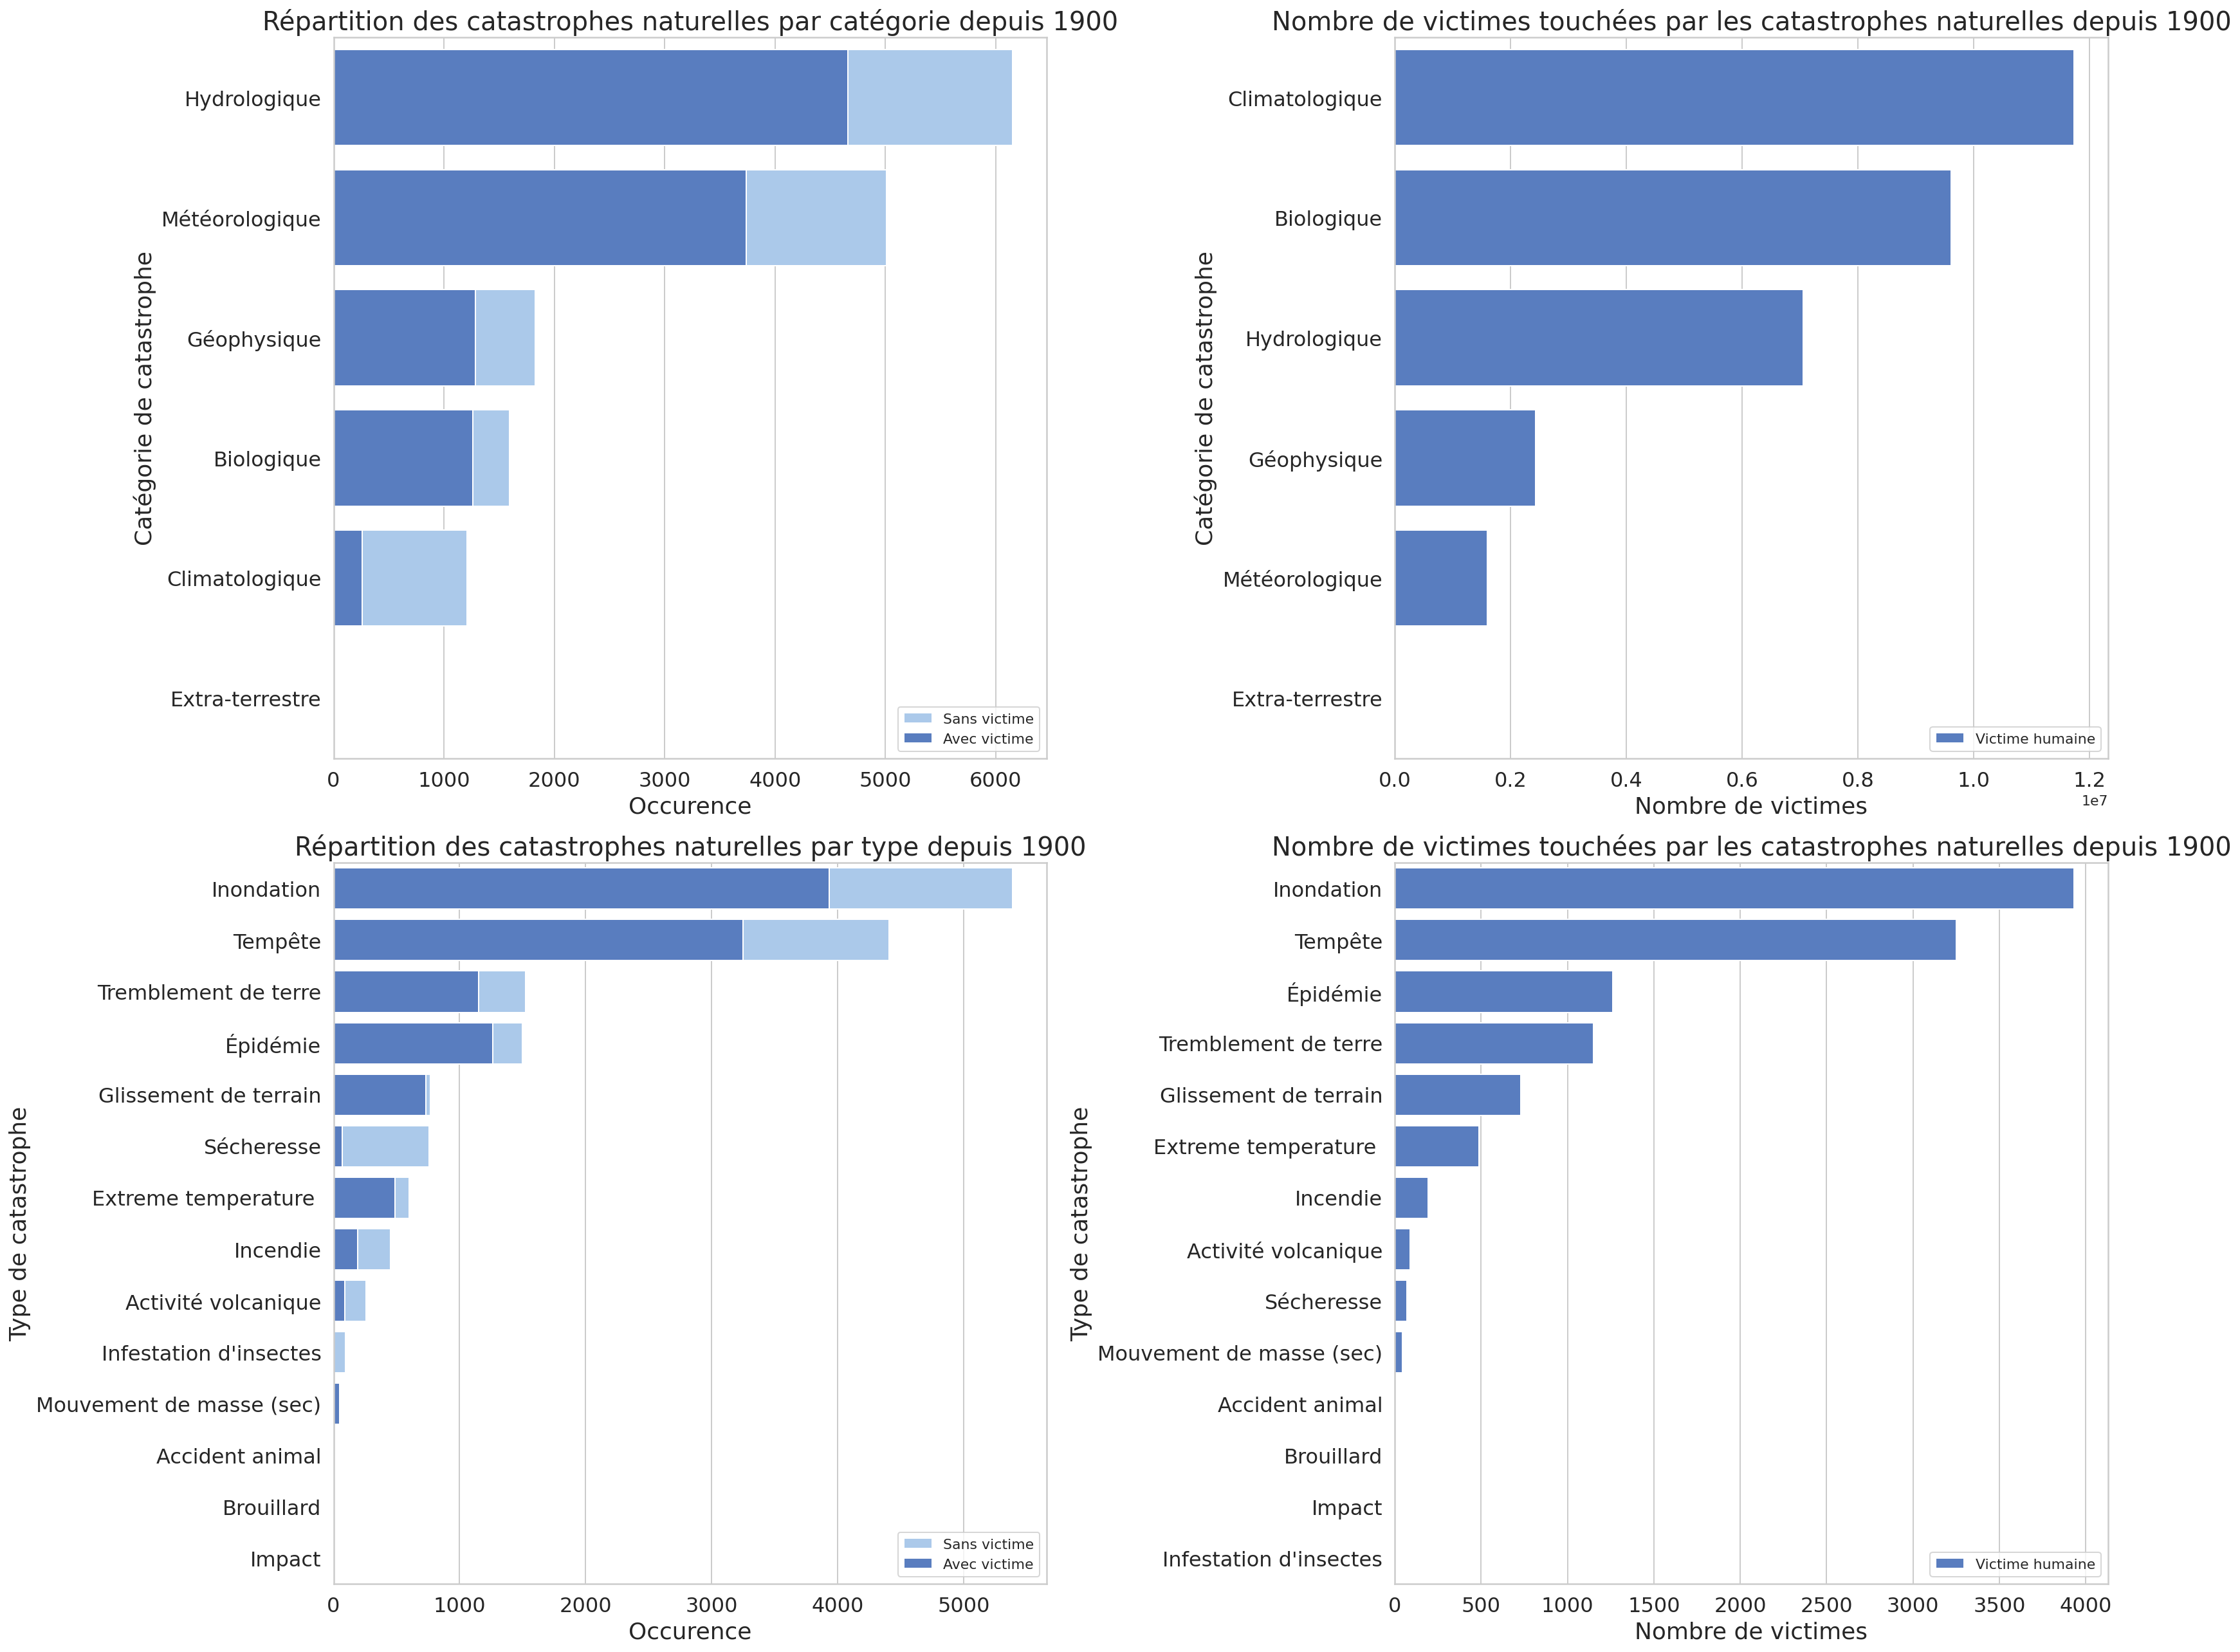

In [32]:
fig, ax = plt.subplots(figsize = (24, 18))

sns.set_theme(style = sns_style)

ax1 = plt.subplot(221)
data_ax1 = ds_count

sns.set_color_codes('pastel')
sns.barplot(
    data = data_ax1,
    y = data_ax1.index,
    x = data_ax1['Country'],
    color = 'b',
    label = 'Sans victime'
    )

sns.set_color_codes('muted')
sns.barplot(
    data = data_ax1,
    y = data_ax1.index,
    x = data_ax1['Total Deaths'],
    color = 'b',
    label = 'Avec victime'
    )

ax1.set_title('Répartition des catastrophes naturelles par catégorie depuis 1900', fontdict = plt_title_settings)
plt.legend(loc = 'lower right')
ax1.set_xlabel('Occurence', fontdict = plt_label_settings)
ax1.set_ylabel('Catégorie de catastrophe', fontdict = plt_label_settings)
ax1.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

ax2 = plt.subplot(222)
data_ax2 = ds_sum

sns.set_color_codes('muted')
sns.barplot(
    data = data_ax2,
    y = data_ax2.index,
    x = data_ax2['Total Deaths'],
    color = 'b',
    label = 'Victime humaine'
    )

ax2.set_title('Nombre de victimes touchées par les catastrophes naturelles depuis 1900', fontdict = plt_title_settings)
plt.legend(loc = 'lower right')
ax2.set_xlabel('Nombre de victimes', fontdict = plt_label_settings)
ax2.set_ylabel('Catégorie de catastrophe', fontdict = plt_label_settings)
ax2.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

ax3 = plt.subplot(223)
data_ax3 = dt_count

sns.set_color_codes('pastel')
sns.barplot(
    data = data_ax3,
    y = data_ax3.index,
    x = data_ax3['Country'],
    color = 'b',
    label = 'Sans victime'
    )

sns.set_color_codes('muted')
sns.barplot(
    data = data_ax3,
    y = data_ax3.index,
    x = data_ax3['Total Deaths'],
    color = 'b',
    label = 'Avec victime'
    )

ax3.set_title('Répartition des catastrophes naturelles par type depuis 1900', fontdict = plt_title_settings)
plt.legend(loc = 'lower right')
ax3.set_xlabel('Occurence', fontdict = plt_label_settings)
ax3.set_ylabel('Type de catastrophe', fontdict = plt_label_settings)
ax3.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

ax4 = plt.subplot(224)
data_ax4 = dt_sum

sns.set_color_codes('muted')
sns.barplot(
    data = data_ax4,
    y = data_ax4.index,
    x = data_ax4['Total Deaths'],
    color = 'b',
    label = 'Victime humaine'
    )

ax4.set_title('Nombre de victimes touchées par les catastrophes naturelles depuis 1900', fontdict = plt_title_settings)
plt.legend(loc = 'lower right')
ax4.set_xlabel('Nombre de victimes', fontdict = plt_label_settings)
ax4.set_ylabel('Type de catastrophe', fontdict = plt_label_settings)
ax4.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

plt.tight_layout()
plt.show()

## Version longue

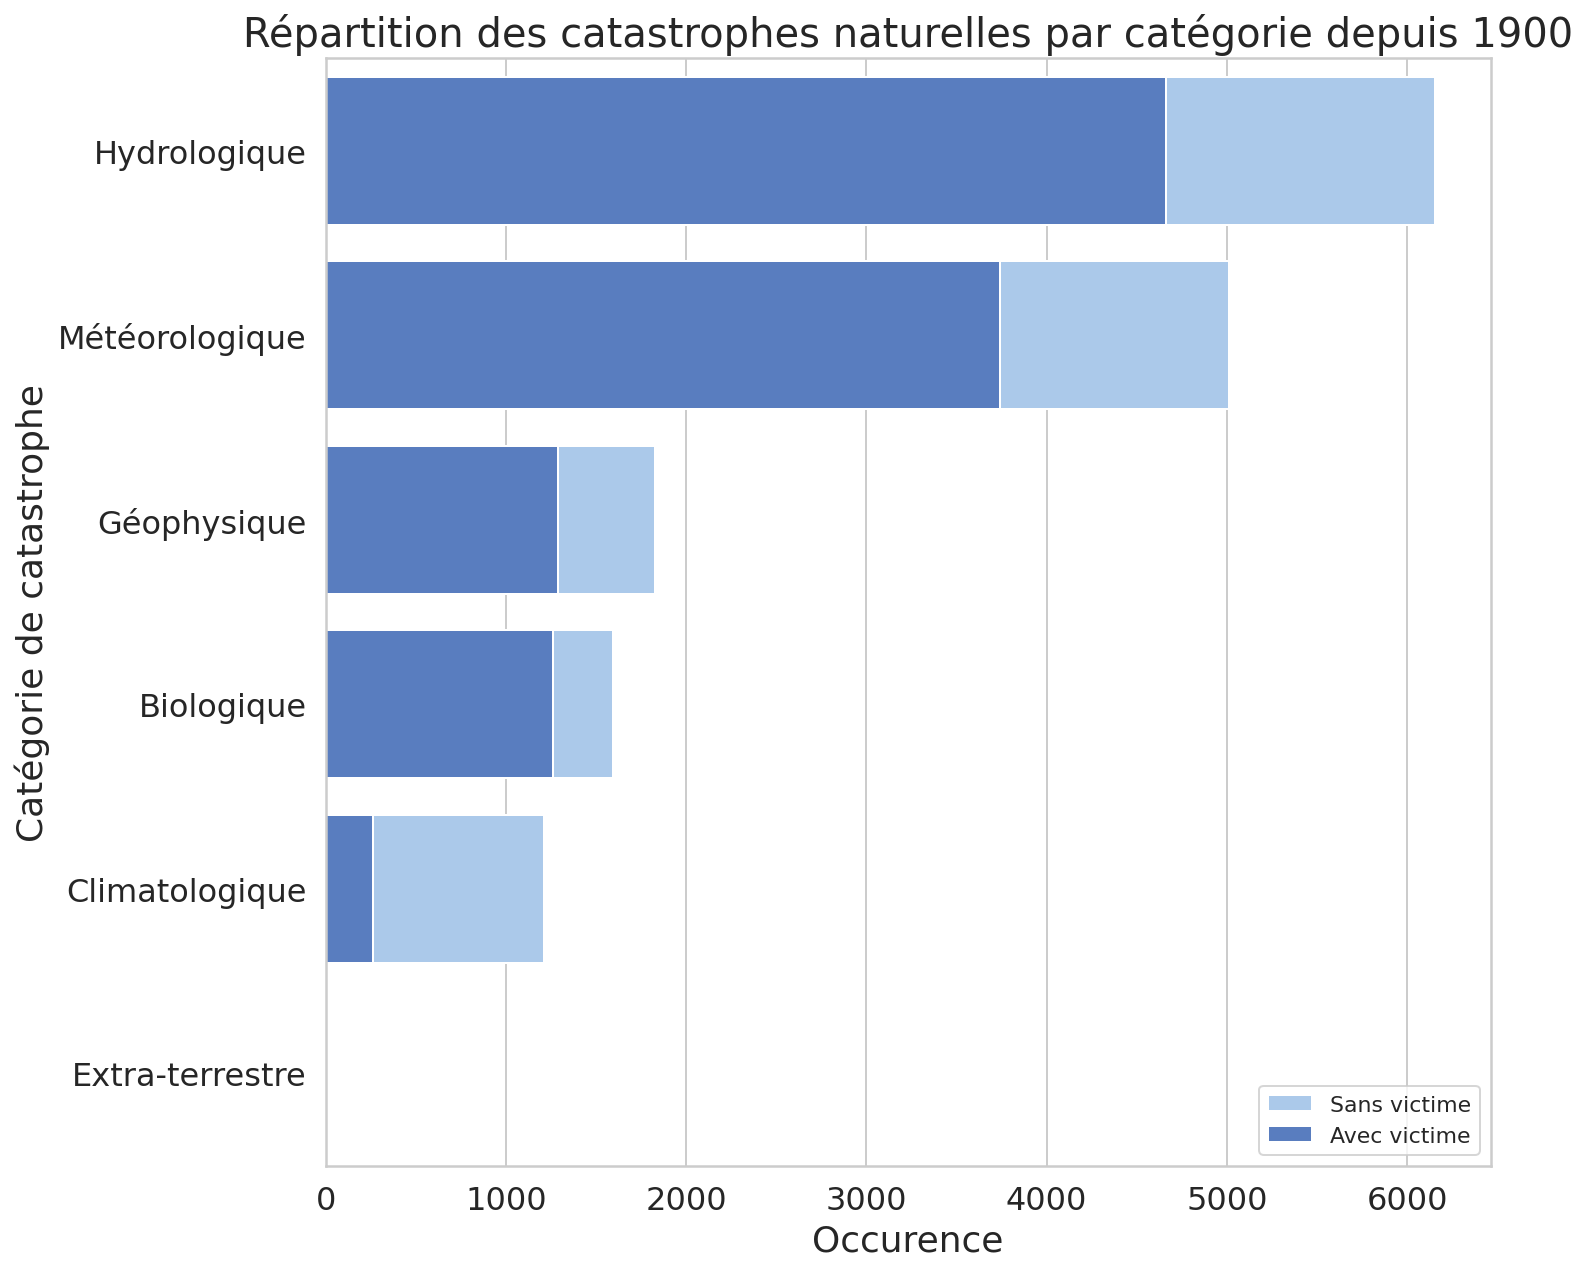

In [15]:
data_ax1 = ds_count

fig = plt.figure(figsize = fig_size)

sns.set_theme(style = sns_style)

sns.set_color_codes('pastel')
sns.barplot(
    data = data_ax1,
    y = data_ax1.index,
    x = data_ax1['Country'],
    color = 'b',
    label = 'Sans victime'
    )

sns.set_color_codes('muted')
sns.barplot(
    data = data_ax1,
    y = data_ax1.index,
    x = data_ax1['Total Deaths'],
    color = 'b',
    label = 'Avec victime'
    )

plt.title('Répartition des catastrophes naturelles par catégorie depuis 1900', fontdict = plt_title_settings)
plt.legend(loc = 'lower right')
plt.xlabel('Occurence', fontdict = plt_label_settings)
plt.ylabel('Catégorie de catastrophe', fontdict = plt_label_settings)
plt.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

plt.tight_layout()
plt.show()

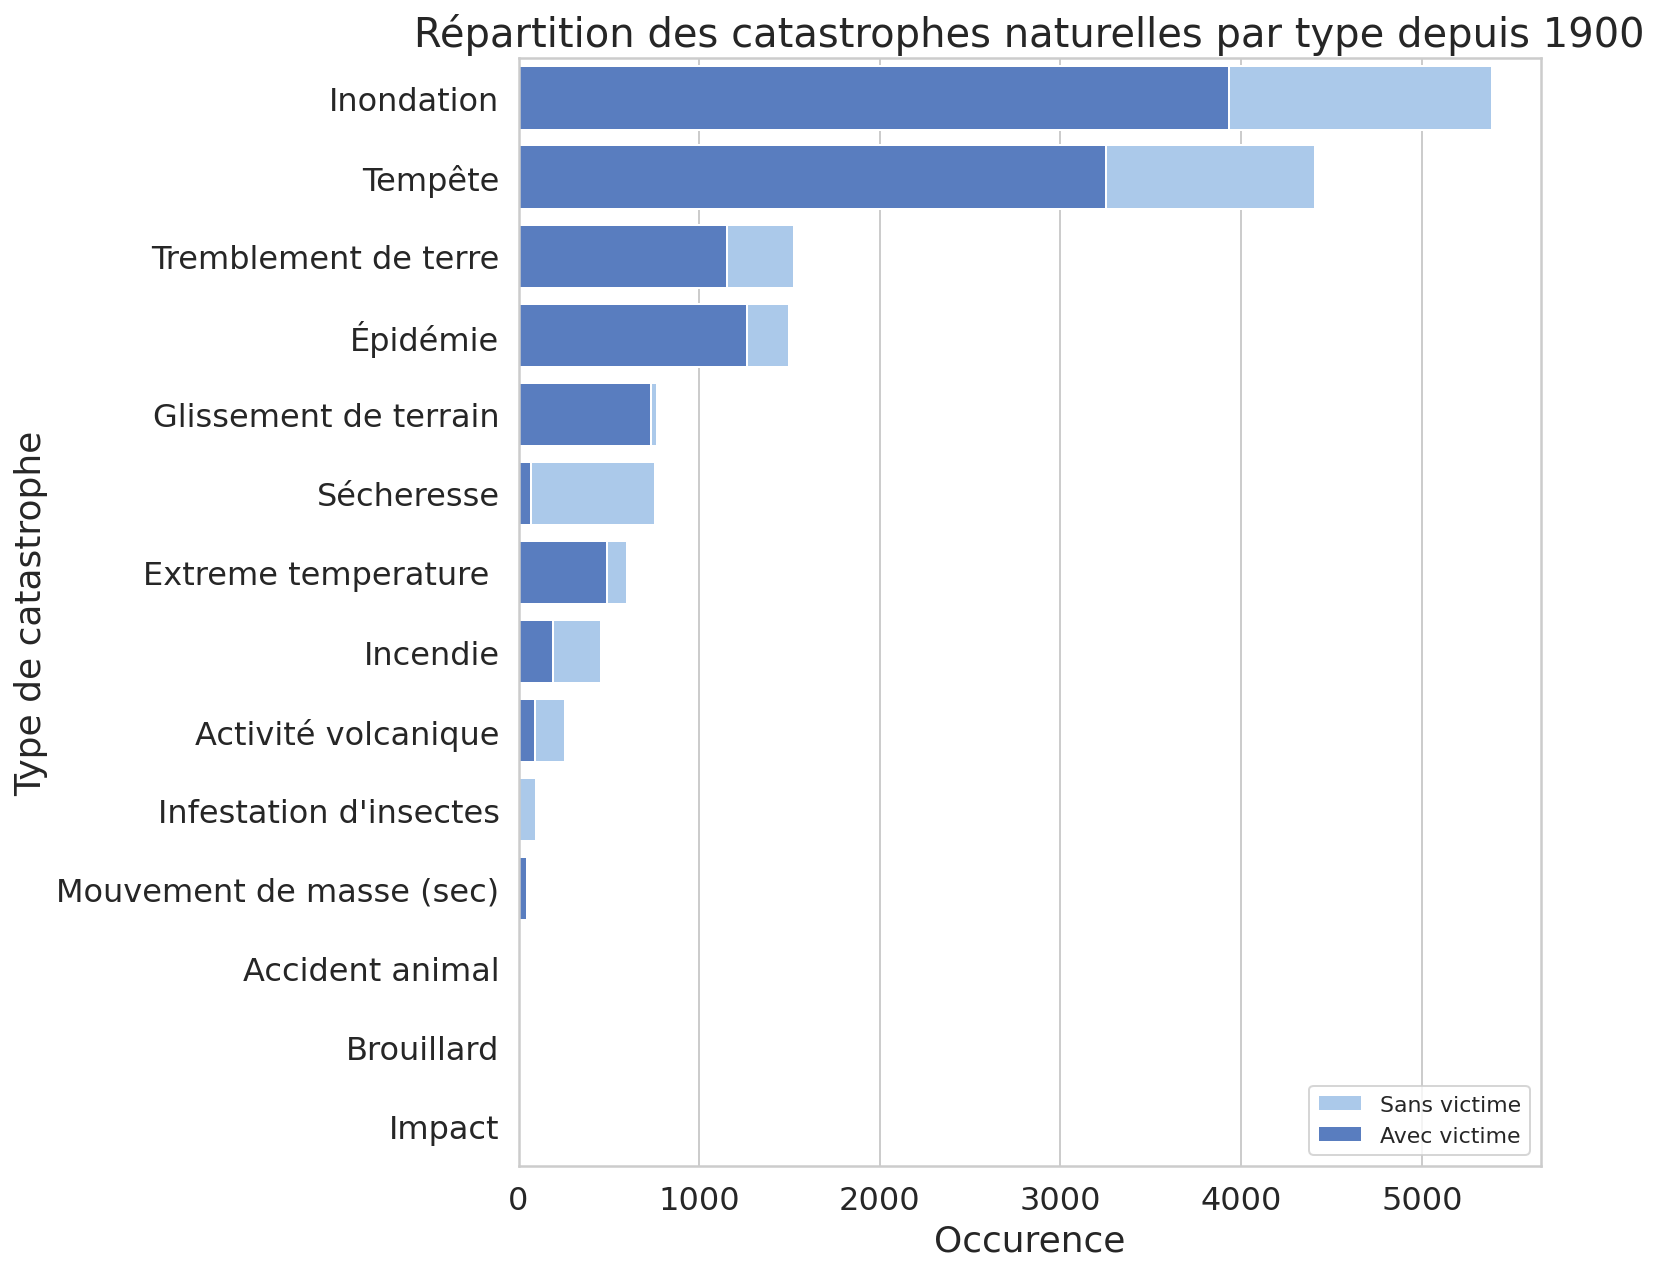

In [16]:
data_ax3 = dt_count

fig = plt.figure(figsize = fig_size)

sns.set_theme(style = sns_style)

sns.set_color_codes('pastel')
sns.barplot(
    data = data_ax3,
    y = data_ax3.index,
    x = data_ax3['Country'],
    color = 'b',
    label = 'Sans victime'
    )

sns.set_color_codes('muted')
sns.barplot(
    data = data_ax3,
    y = data_ax3.index,
    x = data_ax3['Total Deaths'],
    color = 'b',
    label = 'Avec victime'
    )

plt.title('Répartition des catastrophes naturelles par type depuis 1900', fontdict = plt_title_settings)
plt.legend(loc = 'lower right')
plt.xlabel('Occurence', fontdict = plt_label_settings)
plt.ylabel('Type de catastrophe', fontdict = plt_label_settings)
plt.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

plt.tight_layout()
plt.show()

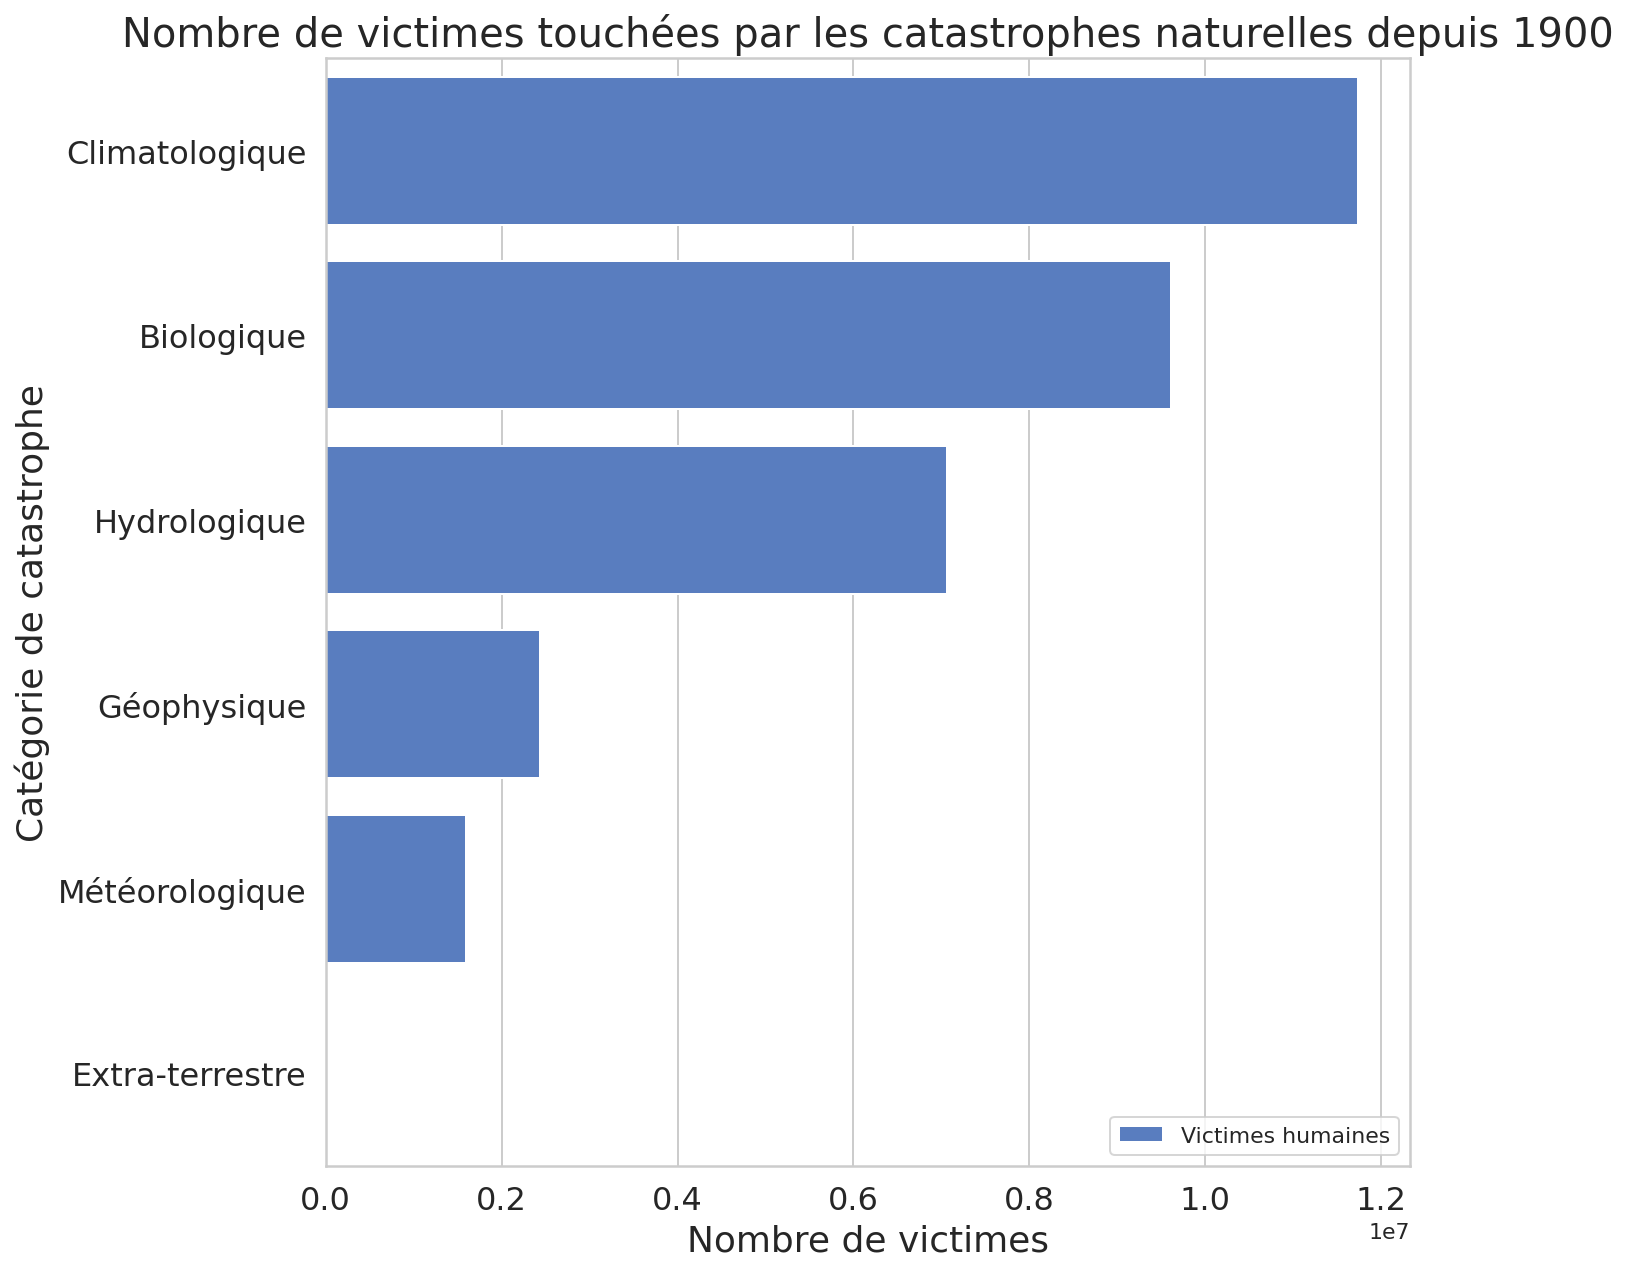

In [17]:
data_ax2 = ds_sum

fig = plt.figure(figsize = fig_size)

sns.set_theme(style = sns_style)

sns.set_color_codes('muted')
sns.barplot(
    data = data_ax2,
    y = data_ax2.index,
    x = data_ax2['Total Deaths'],
    color = 'b',
    label = 'Victimes humaines'
    )

plt.title('Nombre de victimes touchées par les catastrophes naturelles depuis 1900', fontdict = plt_title_settings)
plt.legend(loc = 'lower right')
plt.xlabel('Nombre de victimes', fontdict = plt_label_settings)
plt.ylabel('Catégorie de catastrophe', fontdict = plt_label_settings)
plt.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

plt.tight_layout()
plt.show()

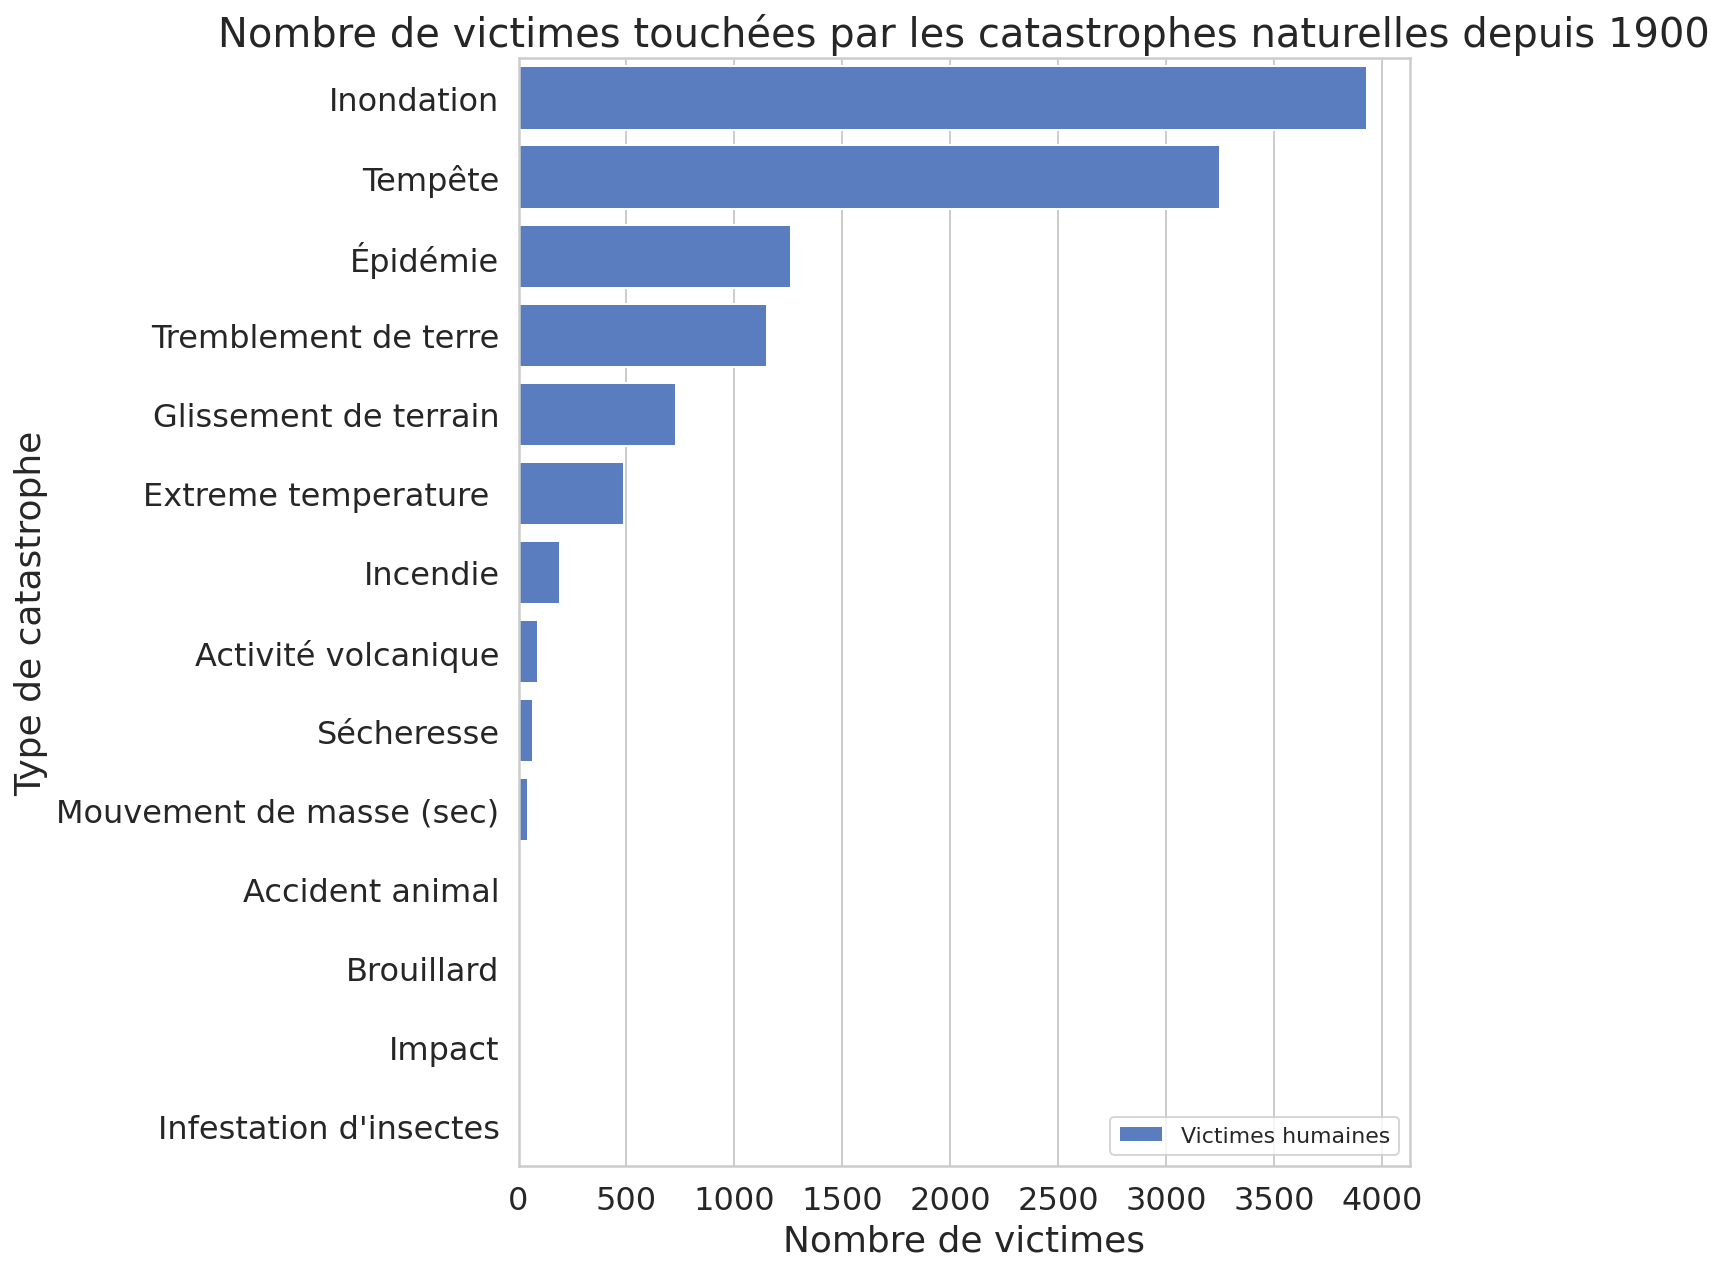

In [18]:
data_ax4 = dt_sum

fig = plt.figure(figsize = fig_size)

sns.set_theme(style = sns_style)

sns.set_color_codes('muted')
sns.barplot(
    data = data_ax4,
    y = data_ax4.index,
    x = data_ax4['Total Deaths'],
    color = 'b',
    label = 'Victimes humaines'
    )

plt.title('Nombre de victimes touchées par les catastrophes naturelles depuis 1900', fontdict = plt_title_settings)
plt.legend(loc = 'lower right')
plt.xlabel('Nombre de victimes', fontdict = plt_label_settings)
plt.ylabel('Type de catastrophe', fontdict = plt_label_settings)
plt.tick_params(axis = 'both', which = 'major', labelsize = tick_size)

plt.tight_layout()
plt.show()

# Working in progress